В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping

In [ ]:
from keras.datasets import imdb

In [ ]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 64

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, len(train_data[0]), len(train_data[4]), type(train_data[0])

((25000,), 218, 147, list)

In [ ]:
train_labels.shape

(25000,)

In [ ]:
from keras.utils.data_utils import pad_sequences
input_train=pad_sequences(train_data, maxlen=maxlen)
input_test=pad_sequences(test_data, maxlen=maxlen)

In [ ]:
#y_train=tf.one_hot(train_labels, depth=2)
#y_test=tf.one_hot(train_labels, depth=2)

In [ ]:
model=Sequential([
    Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
    LSTM(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss=losses.BinaryCrossentropy(),
    metrics=['binary_accuracy'],
)

In [ ]:
callback_early_stopping = EarlyStopping(
    monitor="val_binary_accuracy",
    min_delta=0.00001,
    patience=4,
)

In [ ]:
history = model.fit(
    input_train,
    train_labels,
    epochs=20,
    batch_size=batch_size,
    callbacks=[callback_early_stopping],
    validation_data=(input_test, test_labels))
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/20
391/391 [==============================] - 169s 427ms/step - loss: 0.6599 - binary_accuracy: 0.6355 - val_loss: 0.5502 - val_binary_accuracy: 0.7980
Epoch 2/20
391/391 [==============================] - 167s 426ms/step - loss: 0.4471 - binary_accuracy: 0.8377 - val_loss: 0.4060 - val_binary_accuracy: 0.8476
Epoch 3/20
391/391 [==============================] - 165s 423ms/step - loss: 0.3487 - binary_accuracy: 0.8836 - val_loss: 0.3627 - val_binary_accuracy: 0.8665
Epoch 4/20
391/391 [==============================] - 164s 421ms/step - loss: 0.3048 - binary_accuracy: 0.8998 - val_loss: 0.3686 - val_binary_accuracy: 0.8634
Epoch 5/20
391/391 [==============================] - 153s 391ms/step - loss: 0.2612 - binary_accuracy: 0.9143 - val_loss: 0.3135 - val_binary_accuracy: 0.8811
Epoch 6/20
391/391 [==============================] - 168s 430ms/step - loss: 0.2315 - binary_accuracy: 0.9237 - val_loss: 0.3327 - val_binary_accuracy: 0.8717
Epoch 7/20
391/391 [====================

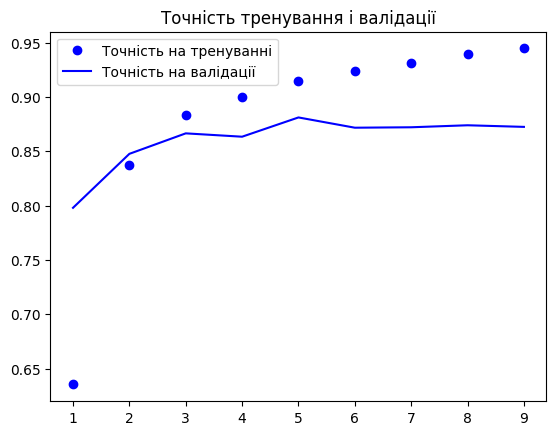

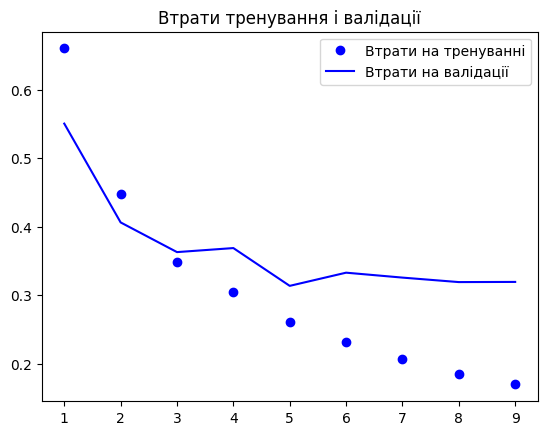

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [ ]:
results = model.evaluate(input_test, test_labels)
print(results)

782/782 [==============================] - 45s 57ms/step - loss: 0.3192 - binary_accuracy: 0.8724
[0.3192031979560852, 0.872439980506897]


In [ ]:
model.save("/content/drive/MyDrive/Data S/Hw11/model_Hw11_LSTM2_")